# Pendulum Simulation

## Initial Pendulum

Pendulum with length $L$ and a mass $m$
If we take the point of rotation as the origin in a coordinate system then we get position in terms of the angle at a given time $$x(t) = L\sin{\theta(t)}$$ $$y(t) = -L\cos{\theta(t)}$$
The velocity (first derivitive) of the bob is: $$v_x=L\dot{\theta}\cos\theta$$ $$v_y=L\dot{\theta}\sin\theta$$
Calculating the kinetic and potential energy with this information is: $$KE=\frac12m(\dot{x}^ 2+\dot{y}^ 2)=\frac12mL^2\dot{\theta}^2$$ $$ PE=mgy=-mgL\cos\theta$$
However since the motion is completely described by $\theta$. This allows us to create a Langrangian: $$\mathcal{L} = \frac12mL^2\dot{\theta}^2+mgL\cos\theta$$
Using the Euler-Lagrange equation $\frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial  L}{\partial\dot{\theta}}\right)=\frac{\partial\mathcal{L}}{\partial\theta}$
Solving this equation: $$\ddot{\theta}=-\frac{g}{L}\sin\theta$$
We can set some constants like $\theta(0)=\theta_0$ and $\dot{\theta}(0) = 0$
This equation, however, is not solvable analytically, so we employ numerical methods.

### Euler Method

Simplest method for a numerical integrator:
At a point $x(t)$, we use the slope (tangent) $\dot{x}(t)$ and add it to $x(t)$
$$\dot{\theta}(t + \delta t) = \dot{\theta}(t) + \delta t \cdot f(\theta(t)) = \dot{\theta}(t) - \delta t\cdot\frac{g}{L}\sin[\theta(t)]$$
$$\theta(t+\delta t)=\theta(t)+\delta t \cdot \dot{\theta}(t)$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import *

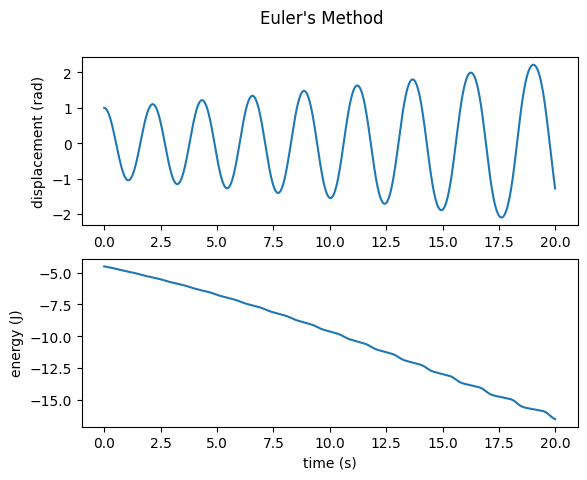

In [2]:
# constants
l = 1  #m
g = 9.81  #m/s^2
m = 1  #kg


def euler(theta0, omega0, t0, dt, nt):
    times = [0] * nt
    angles = [0] * nt
    speeds = [0] * nt

    t = t0
    theta = theta0
    omega = omega0

    for i in range(nt):
        omega_old = omega
        theta_old = theta
        omega = omega_old - (g / l) * np.sin(theta_old) * dt
        theta = theta_old + omega_old * dt
        times[i] = dt * i
        angles[i] = theta
        speeds[i] = omega

    return (times, angles, speeds)


(times, angles, speeds) = euler(1, 0, 0, 0.01, 2000)
# energy values
energy = [0] * len(speeds)
for i in range(len(energy)):
    energy[i] = -0.5 * m * l * l * speeds[i] * speeds[i] - m * g * l * (1 - np.cos(angles[i]));
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("Euler's Method")
ax1.plot(times, angles)
ax2.plot(times, energy)
ax1.set_ylabel("displacement (rad)")
ax2.set_xlabel("time (s)")
ax2.set_ylabel("energy (J)")
plt.show()

## Euler-Cromer Method
However, we can see that the total energy of the system slowly increases and is not physically possible. Euler's method propagates the curve from $x(t)$ to $x(t + \delta t)$. Instead of using the slope at the beginning interval, we an try the end of the interval.
This gives us:
$$\dot{\theta}(t + \delta t) = \dot{\theta}(t) + \delta t \cdot f(\theta(t)) = \dot{\theta}(t) - \delta t\cdot\frac{g}{L}\sin[\theta(t)]$$
$$\theta(t+\delta t)=\theta(t)+\delta t \cdot \dot{\theta}(t + \delta t)$$

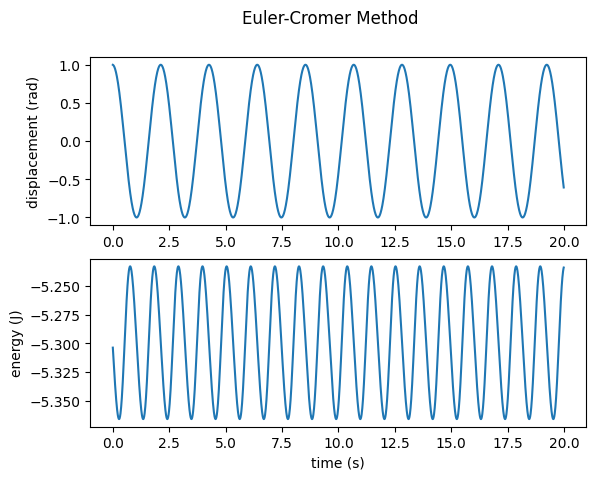

In [3]:
def euler_cromer(theta0, omega0, t0, dt, nt):
    times = [0] * nt
    angles = [0] * nt
    speeds = [0] * nt

    t = t0
    theta = theta0
    omega = omega0

    for i in range(nt):
        omega_old = omega
        theta_old = theta
        omega = omega_old - (g / l) * np.sin(theta_old) * dt
        theta = theta_old + omega * dt
        times[i] = dt * i
        angles[i] = theta
        speeds[i] = omega

    return (times, angles, speeds)


(times, angles, speeds) = euler_cromer(1, 0, 0, 0.01, 2000)
# energy values
energy = [0] * len(speeds)
for i in range(len(energy)):
    energy[i] = 0.5 * m * l * l * speeds[i] * speeds[i] - m * g * l * (np.cos(angles[i]));
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("Euler-Cromer Method")
ax1.plot(times, angles)
ax2.plot(times, energy)
ax1.set_ylabel("displacement (rad)")
ax2.set_xlabel("time (s)")
ax2.set_ylabel("energy (J)")
plt.show()

## Runge-Kutta Method
We can still see that the Euler-Cromer method is inaccurate and the total energy oscillates. We can further improve this y instead averaging multiple slopes between the interval $x(t)$ and $x(t + \delta t)$ to get a more accurate slope

We will use the classic 4th order (RK4):

$$k_1 = \delta t f(t, \theta)$$
$$k_2 = \delta t f(t + \frac12 \delta t, \theta + \frac12 k_1)$$
$$k_3 = \delta t f(t + \frac12 \delta t, \theta + \frac12 k_2)$$
$$k_4 = \delta t f(t + \delta t, \theta + k_3)$$
$$\theta(t + \delta t) = \theta(t) + (k_1 + 2 k_2 + 2k_3 + k_4) /6$$
where $f(t, \theta)$ is the derivitave taken at the beginning of the interval from $[t,  t + \delta t]$

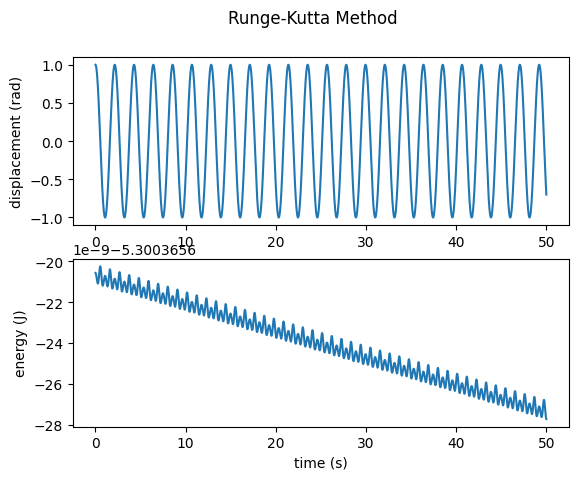

In [4]:
def f(r, t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g / l) * np.sin(theta)
    return np.array([ftheta, fomega], dtype=float)


def rk4(theta0, omega0, t0, tf, nt):
    dt = (tf - t0) / nt
    times = np.arange(t0, tf, dt)
    angles = []
    speeds = []

    r = np.array([theta0, omega0], dtype=float)
    for t in times:
        angles.append(r[0])
        speeds.append(r[1])
        k1 = dt * f(r, t)
        k2 = dt * f(r + 0.5 * k1, t + 0.5 * dt)
        k3 = dt * f(r + 0.5 * k2, t + 0.5 * dt)
        k4 = dt * f(r + k3, t + dt)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6.0

    return (times, angles, speeds)


(times, angles, speeds) = rk4(1, 0, 0, 50, 10000)
# energy values
energy = [0] * len(speeds)
for i in range(len(energy)):
    energy[i] = 0.5 * m * l * l * speeds[i] * speeds[i] - m * g * l * (np.cos(angles[i]));
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("Runge-Kutta Method")
ax1.plot(times, angles)
ax2.plot(times, energy)
ax1.set_ylabel("displacement (rad)")
ax2.set_xlabel("time (s)")
ax2.set_ylabel("energy (J)")
plt.show()


## Neural Network
Instead of using a numerical integrator that performs multiplications, we can use the multilayer perception model from PyTorch to predict the trajectory of the bob.

To create data to train a basic neural network, we need to create a phase space of the pendulum. The phase space requires use of a Hamiltonian. The hamiltonian of a pendulum is just $$ H(\theta, p) = \frac{p^2}{2ml^2}-mgl(1-\cos\theta)$$ Normally Hamiltonians are based off of $q$ and $p$, however we use $\theta$ in place of q as the generalized coordinate. We can set some constants as before to simplify the equation to $$H =\frac12p^2+9.81(1-\cos\theta)$$

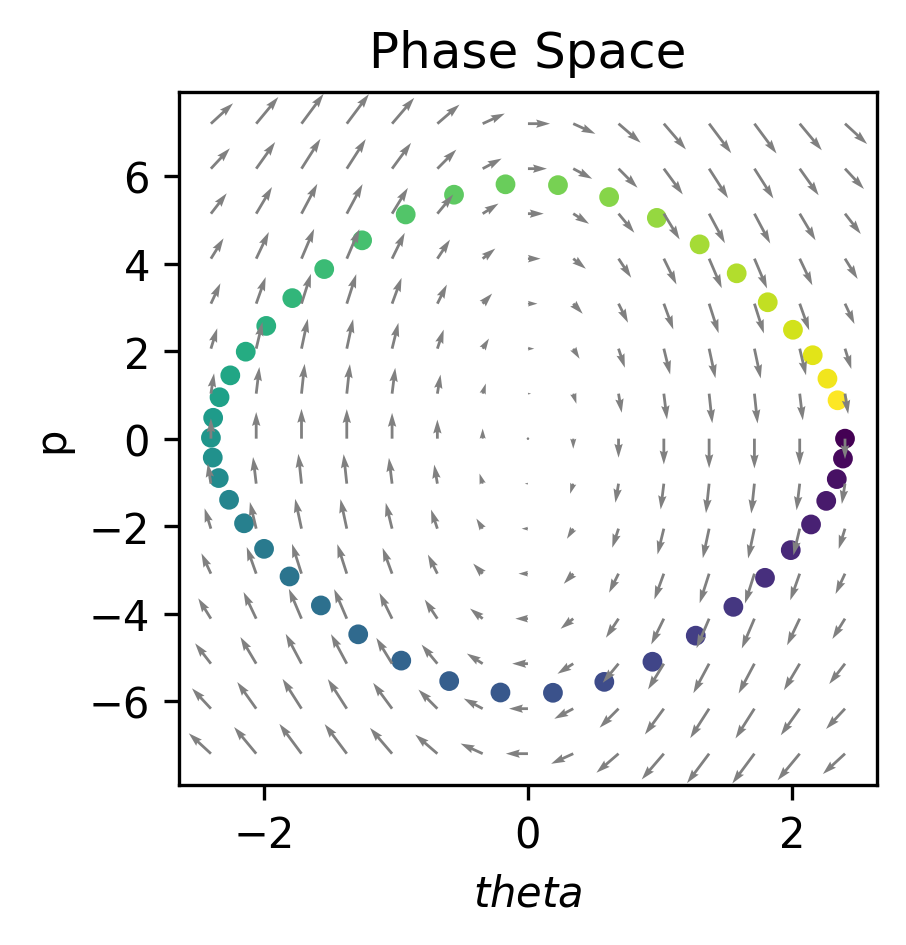

In [5]:
from data import get_trajectory, get_field, get_dataset

fig = plt.figure(figsize=(3, 3), facecolor='white', dpi=300)
x, y, dx, dy, t = get_trajectory(radius=2.4, y0=np.array([2, 0]), noise_std=0.0)
R = 2.4
field = get_field(xmin=-3 * R, xmax=3 * R, ymin=-R, ymax=R, gridsize=15)
plt.scatter(x, y, c=t, s=14, label='data')
plt.quiver(field['x'][:, 0], field['x'][:, 1], field['dx'][:, 0], field['dx'][:, 1], cmap='gray_r', color=(.5, .5, .5))
plt.xlabel("$theta$")
plt.ylabel("p")
plt.title("Phase Space")
plt.show()

In [6]:
from MLP import MLP
from nn import nn_model
import torch
import scipy.integrate

solve_ivp = scipy.integrate.solve_ivp


def get_model():
    mlp = MLP(2, 1000, 2, 'tanh')
    model = nn_model(2, differentiable_model=mlp, field_type='solenoidal')
    path = 'pend.pt'
    model.load_state_dict(torch.load(path))
    return model


def get_vector_fields(model, **kwargs):
    field = get_field(**kwargs)
    meshx = field['x']

    mesh_x = torch.tensor(meshx, requires_grad=True, dtype=torch.float32)
    mesh_dx = model.time_deriv(mesh_x)
    return mesh_dx.detach().numpy()


def integrate_model(model, tspan, y0, **kwargs):
    def fun(t, npx):
        x = torch.tensor(npx, requires_grad=True, dtype=torch.float32).view(1, 2)
        dx = model.time_deriv(x).data.numpy().reshape(-1)
        return dx

    return solve_ivp(fun, tspan, y0, **kwargs)


model = get_model()
R = 2.4
field = get_field(xmin=-3 * R, xmax=3 * R, ymin=-R, ymax=R, gridsize=10)

model_field = get_vector_fields(model, xmin=-3 * R, xmax=3 * R, ymin=-R, ymax=R, gridsize=10)

tspan = [0, 30]
y0 = np.array([2, 0])
kwargs = {'t_eval': np.linspace(tspan[0], tspan[1], 1000), 'rtol': 1e-12}
model_ivp = integrate_model(model, tspan, y0, **kwargs)


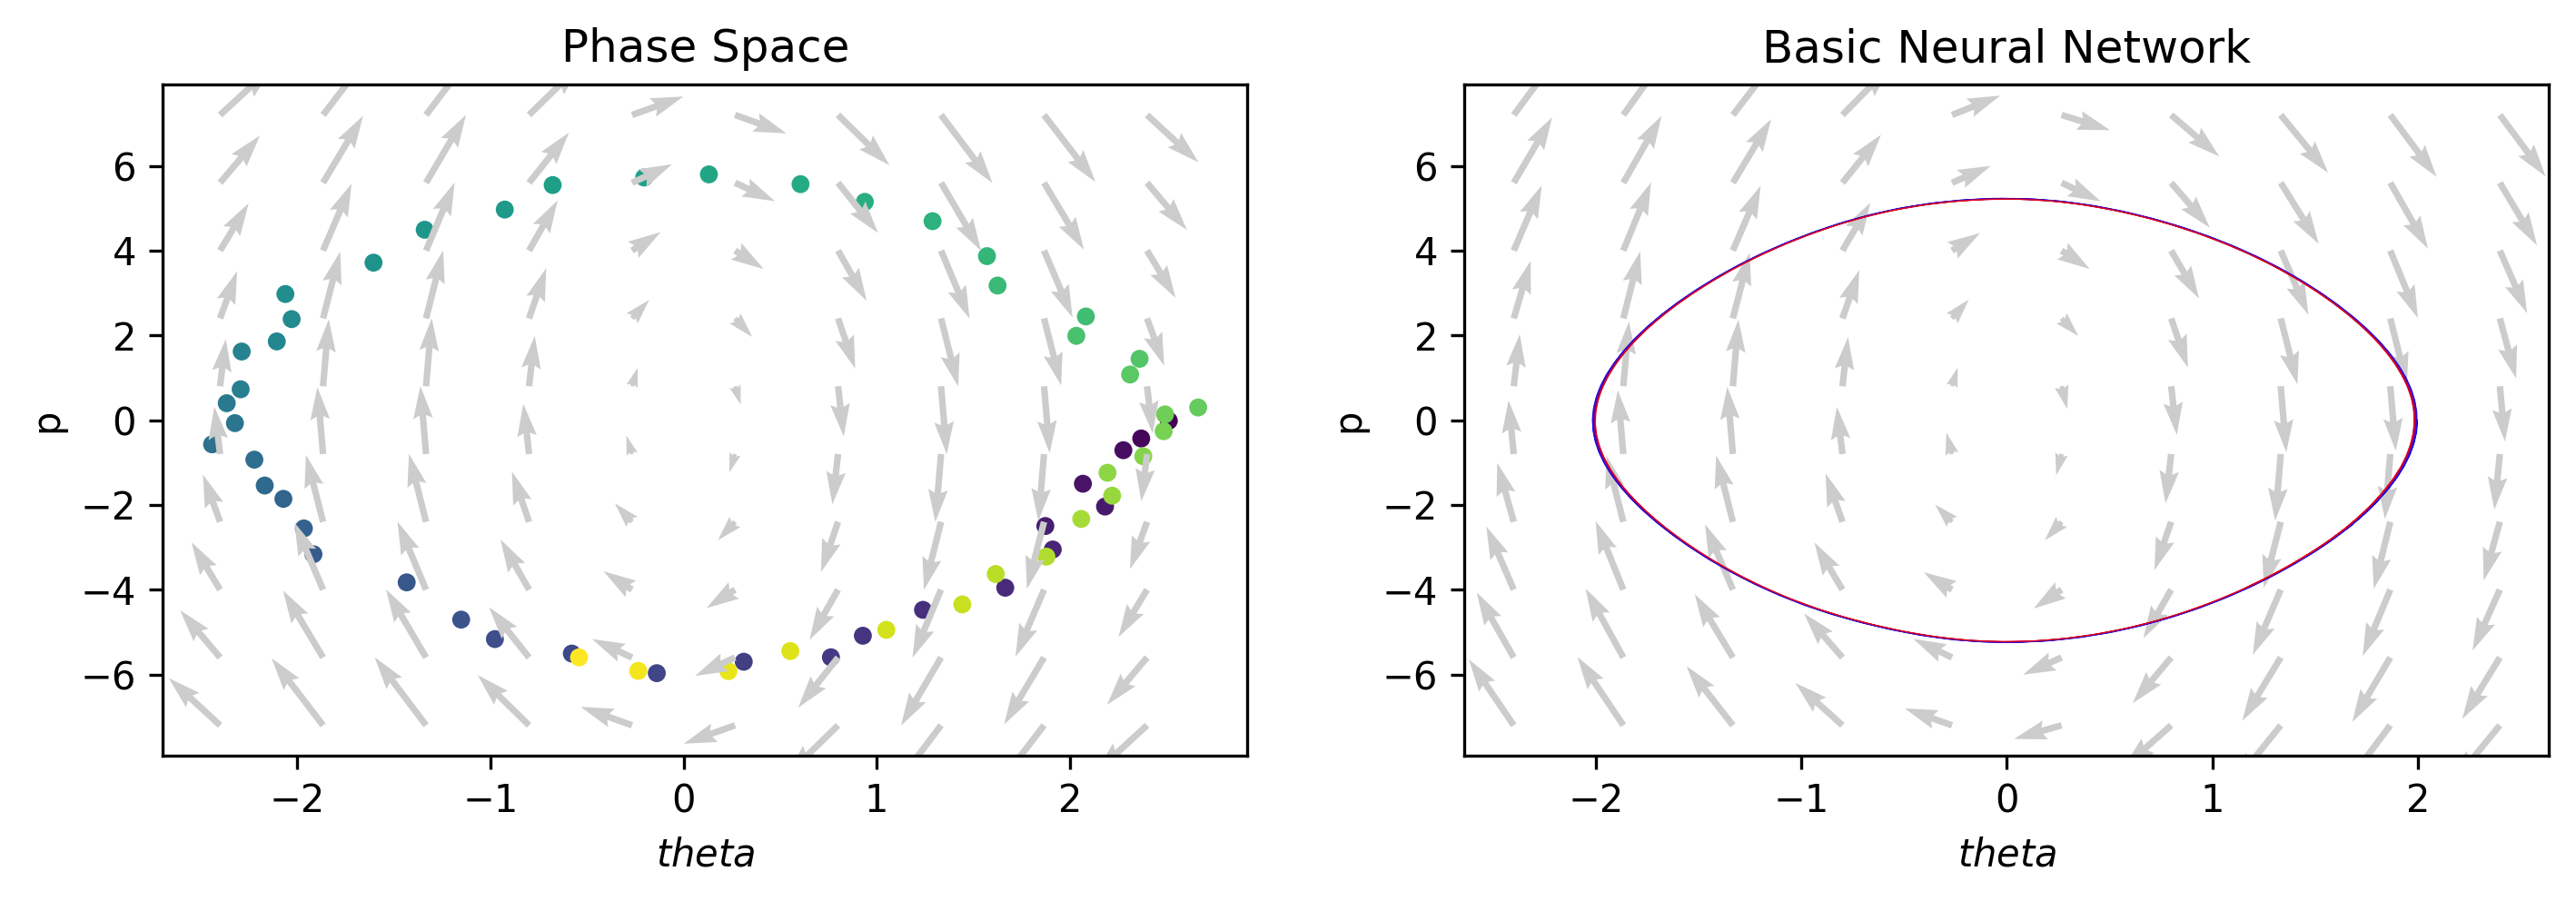

In [7]:
fig = plt.figure(figsize=(11.3, 3.2), facecolor='white', dpi=300)

fig.add_subplot(1, 2, 1, frameon=True)
x, y, dx, dy, t = get_trajectory(t_span=[0, 4], radius=R, y0=y0)
plt.scatter(x, y, c=t, s=14, label='data')
plt.quiver(field['x'][:, 0], field['x'][:, 1], field['dx'][:, 0], field['dx'][:, 1], cmap='gray_r', color=(.8, .8, .8))
plt.xlabel("$theta$")
plt.ylabel("p")
plt.title("Phase Space")

fig.add_subplot(1, 2, 2, frameon=True)
plt.quiver(field['x'][:, 0], field['x'][:, 1], model_field[:, 0], model_field[:, 1], cmap='gray_r', color=(.8, .8, .8))
for i, l in enumerate(np.split(model_ivp['y'].T, 10)):
    color = (float(i) / 10, 0, 1 - float(i) / 10)
    plt.plot(l[:, 0], l[:, 1], color=color, linewidth=0.2)

plt.xlabel("$theta$")
plt.ylabel("p")
plt.title("Basic Neural Network")

plt.show()




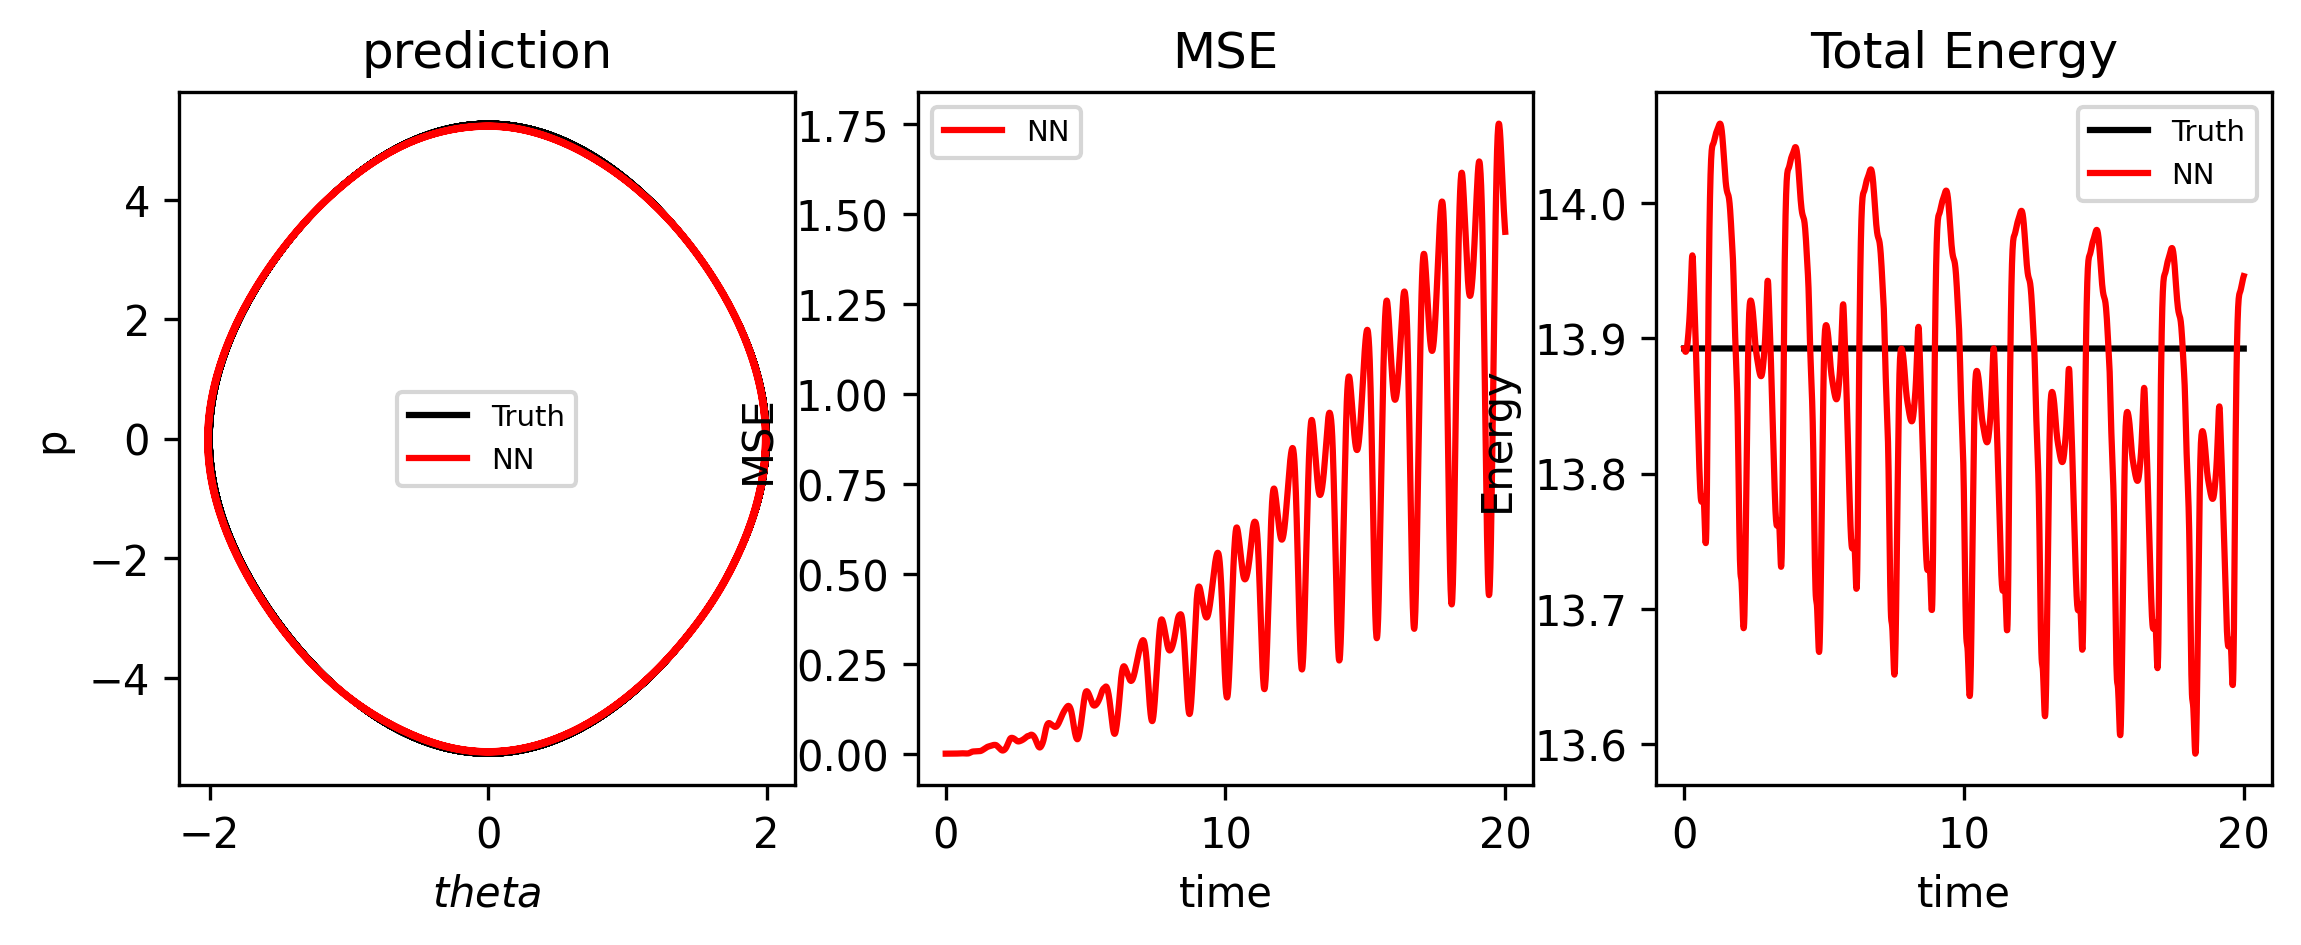

In [8]:
# analysis
from data import dynamics, hamiltonian


def integrate_models(x0=np.asarray([2, 0]), tspan=[0, 5], t_eval=None):
    kwargs = {'t_eval': t_eval, 'rtol': 1e-12}
    true_ivp = solve_ivp(dynamics, tspan, x0, **kwargs)
    true_x = true_ivp['y'].T

    base_ivp = integrate_model(model=model, tspan=tspan, y0=x0, **kwargs)
    base_x = base_ivp['y'].T

    return true_x, base_x


def energy_loss(true_x, other_x):
    true_energy = (true_x ** 2).sum(1)
    other_energy = (other_x ** 2).sum(1)
    return np.mean((true_energy - other_energy) ** 2)


x0 = np.array([2, 0])
tspan = [0, 20]
teval = np.linspace(tspan[0], tspan[1], 2000)
true_x, base_x = integrate_models(x0=x0, tspan=tspan, t_eval=teval)

fig.clear()
fig = plt.figure(figsize=(9, 3), facecolor='white', dpi=300)

fig.add_subplot(1, 3, 1)
plt.title("prediction")
plt.xlabel("$theta$")
plt.ylabel("p")
plt.plot(true_x[:, 0], true_x[:, 1], 'k-', label='Truth')
plt.plot(base_x[:, 0], base_x[:, 1], 'r-', label='NN')
plt.legend(fontsize=7)

fig.add_subplot(1, 3, 2)
plt.title("MSE")
plt.xlabel("time")
plt.ylabel("MSE")
plt.plot(teval, np.mean((true_x - base_x) ** 2, 1), 'r-', label='NN')
plt.legend(fontsize=7)

fig.add_subplot(1, 3, 3)
plt.title("Total Energy")
plt.xlabel("time")
plt.ylabel("Energy")
true_energy = np.stack([hamiltonian(x) for x in true_x])
base_energy = np.stack([hamiltonian(x) for x in base_x])
plt.plot(teval, true_energy, 'k-', label='Truth')
plt.plot(teval, base_energy, 'r-', label='NN')
plt.legend(fontsize=7)

plt.show()